In [1]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

In [2]:
all_files = glob.glob("../roll_data/*-consumers.csv")

df = pd.concat((pd.read_csv(f, dtype={"stadium_id": "string"}) for f in all_files), ignore_index=True)

# select season (zero indexed)
# seasons = [11,12,13,14]
# season = 13
# df = df[df['season'] == season]

C:\Users\rcorc\AppData\Local\Temp\ipykernel_5020\2689530939.py:3: DtypeWarning: Columns (107,123) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f, dtype={"stadium_id": "string"}) for f in all_files), ignore_index=True)
C:\Users\rcorc\AppData\Local\Temp\ipykernel_5020\2689530939.py:3: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f, dtype={"stadium_id": "string"}) for f in all_files), ignore_index=True)
C:\Users\rcorc\AppData\Local\Temp\ipykernel_5020\2689530939.py:3: DtypeWarning: Columns (107) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f, dtype={"stadium_id": "string"}) for f in all_files), ignore_index=True)
C:\Users\rcorc\AppData\Local\Temp\ipykernel_5020\2689530939.py:3: DtypeWarning: Columns (107,123,142) have mixed types. Specify dtype option on import or set low_memory=False.
 

In [4]:
print(df.columns.tolist())

['event_type', 'roll', 'passed', 'batter_buoyancy', 'batter_divinity', 'batter_martyrdom', 'batter_moxie', 'batter_musclitude', 'batter_patheticism', 'batter_thwackability', 'batter_tragicness', 'batter_coldness', 'batter_overpowerment', 'batter_ruthlessness', 'batter_shakespearianism', 'batter_suppression', 'batter_unthwackability', 'batter_base_thirst', 'batter_continuation', 'batter_ground_friction', 'batter_indulgence', 'batter_laserlikeness', 'batter_anticapitalism', 'batter_chasiness', 'batter_omniscience', 'batter_tenaciousness', 'batter_watchfulness', 'batter_pressurization', 'batter_cinnamon', 'batter_multiplier', 'runner_on_first_base_thirst', 'runner_on_first_continuation', 'runner_on_first_ground_friction', 'runner_on_first_indulgence', 'runner_on_first_laserlikeness', 'runner_on_first_multiplier', 'runner_on_second_base_thirst', 'runner_on_second_continuation', 'runner_on_second_ground_friction', 'runner_on_second_indulgence', 'runner_on_second_laserlikeness', 'runner_on_s

In [25]:
di = pd.read_csv("../notebooks/imposition.csv", index_col=0)

dim = pd.melt(di, id_vars=['season', 'day'], var_name="team_name", value_name="team_imPosition")
dim

,season,day,team_name,team_imPosition
0,13,0,Breath Mints,0.035159
1,13,1,Breath Mints,0.261260
2,13,2,Breath Mints,0.484523
3,13,3,Breath Mints,0.580969
4,13,4,Breath Mints,0.550516
...,...,...,...,...
31445,23,94,Noodle,12.000000
31446,23,95,Noodle,12.000000
31447,23,96,Noodle,12.000000
31448,23,97,Noodle,12.000000


In [35]:
dimf = pd.merge(df, dim, on=['season', 'day', 'team_name'])
print(dimf)

     event_type      roll passed  batter_buoyancy  batter_divinity  \
0          Miss  0.003936  False         0.510276         0.619616   
1          Miss  0.008085  False         0.261251         1.017299   
2          Miss  0.018269  False         0.487176         0.293503   
3          Miss  0.011325  False         0.457300         0.823186   
4          Miss  0.007536  False         0.630025         0.843942   
...         ...       ...    ...              ...              ...   
1820       Miss  0.015069  False         1.192703         0.772639   
1821       Miss  0.019455  False         1.438337         0.567690   
1822       Miss  0.012280  False         0.600767         0.267499   
1823       Miss  0.005527  False         0.570426         0.214771   
1824       Miss  0.008460  False         1.242243         1.372750   

      batter_martyrdom  batter_moxie  batter_musclitude  batter_patheticism  \
0             0.975892      0.333577           0.386584            0.856324   
1

In [5]:
print(df)

      event_type      roll passed  batter_buoyancy  batter_divinity  \
0           Miss  0.072903  False         0.740123         1.111076   
1           Miss  0.802161  False         0.457300         0.823186   
2           Miss  0.557993  False         0.457300         0.823186   
3           Miss  0.636728  False         0.457300         0.823186   
4           Miss  0.683978  False         0.645436         1.140926   
...          ...       ...    ...              ...              ...   
90899       Miss  0.413367  False         1.155225         1.212299   
90900       Miss  0.045451  False         1.459612         0.605426   
90901       Miss  0.017018  False         1.459612         0.605426   
90902       Miss  0.884378  False         1.459612         0.605426   
90903       Miss  0.916536  False         1.459612         0.605426   

       batter_martyrdom  batter_moxie  batter_musclitude  batter_patheticism  \
0              1.112143      1.181096           0.698159           

In [37]:
dimf = dimf[dimf["roll"] < 0.02]

dimf_attack = dimf[dimf["event_type"].astype(str).str.contains("Attack")]
dimf_noattack = dimf[dimf["event_type"].astype(str).str.contains("Miss")]
dimf_target = dimf[~dimf["event_type"].astype(str).str.contains("Attack|Miss")]

print(dimf_attack)
print(dimf_target)
print(dimf_noattack)

     event_type      roll passed  batter_buoyancy  batter_divinity  \
56       Attack  0.000017   True         0.292341         1.099172   
241      Attack  0.000420   True         0.823724         0.942263   
383      Attack  0.001015   True         1.112046         0.841341   
407      Attack  0.000196   True         0.566892         0.404995   
411      Attack  0.000102   True         1.036379         0.222922   
...         ...       ...    ...              ...              ...   
1794     Attack  0.000660   True         0.064965         0.580503   
1799     Attack  0.002226   True         1.036379         0.222922   
1800     Attack  0.002690   True         0.966896         0.676494   
1801     Attack  0.009361   True         0.582000         0.564604   
1802     Attack  0.001329   True         0.332626         0.829225   

      batter_martyrdom  batter_moxie  batter_musclitude  batter_patheticism  \
56            0.706289      0.943638           0.794285            0.001000   
2

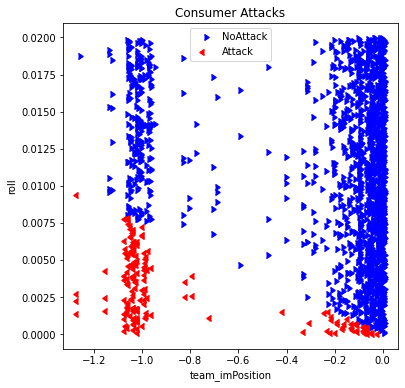

In [38]:
y_val = "roll"
x_val = "team_imPosition"
dimf_noattack = dimf_noattack.copy()
dimf_attack = dimf_attack.copy()

fig, ax = plt.subplots(1, figsize=(6, 6))

ax.scatter(
     dimf_noattack[x_val],
     dimf_noattack[y_val],
     color="blue",
     label="NoAttack",
     marker=CARETRIGHTBASE,
 )
ax.scatter(
     dimf_attack[x_val],
     dimf_attack[y_val],
     color="red",
     label="Attack",
     marker=CARETLEFTBASE,
 )
ax.set_xlabel(x_val)
ax.set_ylabel(y_val)
ax.set_title("Consumer Attacks")

if x_val == "threshold":
    ax.plot(ax.get_xlim(), ax.get_xlim())

ax.legend()

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, linear_model

y = dimf['passed'].astype(int)

X = dimf[['roll','team_imPosition']]

sc = StandardScaler()
X2 = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

trainedsvm = svm.LinearSVC(dual=False, C=100000, max_iter=10000, tol=1e-10).fit(X2, y)
predictionsvm = trainedsvm.predict(X2)
confusion_matrix(y,predictionsvm)

array([[1661,    0],
       [   0,  164]], dtype=int64)

In [52]:
coef = np.true_divide(trainedsvm.coef_, sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]

intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept_scaled = intercept / coef[0, 0]
print(intercept_scaled)
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[-8.84756928e-06]


[(1.0, 'roll'), (0.007485543895970793, 'team_imPosition')]